
Welcome to the fascinating analysis of the success of major YouTube channels through the lens of data. Using Python, especially the power of Pandas, we dive into a world of captivating statistics. Our dataset is full of valuable information about YouTubers, from their subscribers to their earnings, to the categories and content they offer. Our objective ? Demystify the key factors that propel these chains to the top.
At the heart of our analysis lies the search for the secrets of success. As we explore the data, we'll shed light on the most popular categories, transcending borders to have global impact. The geographic trends of successful channels will reveal themselves on a captivating global map, while the correlations between performance and estimated revenue will reveal intriguing insights.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
pd.options.display.float_format='{:,.0f}'.format
pd.options.display.max_rows=None
pd.options.display.max_columns=None
sns.set()

In [2]:

df=pd.read_csv("Global YouTube Statistics.csv",encoding="ISO-8859-1")

Data cleaning:
- delete "video views" which contains the value 0
- Delete "highest_yearly_earnings" which contains the value 0
- change "category" which contains NAN values with the values of "Channel type" then delete the rest values which contain NAN values
- remove "country" with NAN values
- remove "created_year" with NAN values
- convert "created year" data types from float type to integer type
- delete the two columns "countr_rank" and "channel_type_rank"
- remove "Latitude" with NAN values

In [3]:
df.head(13)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,"228,000,000,000",Music,T-Series,20082,India,IN,Music,1,1,1,"2,258,000,000","564,600","9,000,000","6,800,000","108,400,000","2,000,000","2,006",Mar,13,28,"1,366,417,754",5,"471,031,528",21,79
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,"4,055,159","7,670","7,423",12,0,0,0,1,NaN,"2,006",Mar,5,88,"328,239,523",15,"270,663,028",37,-96
2,3,MrBeast,166000000,"28,368,841,870",Entertainment,MrBeast,741,United States,US,Entertainment,48,1,1,"1,348,000,000","337,000","5,400,000","4,000,000","64,700,000","8,000,000","2,012",Feb,20,88,"328,239,523",15,"270,663,028",37,-96
3,4,Cocomelon - Nursery Rhymes,162000000,"164,000,000,000",Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,2,1,"1,975,000,000","493,800","7,900,000","5,900,000","94,800,000","1,000,000","2,006",Sep,1,88,"328,239,523",15,"270,663,028",37,-96
4,5,SET India,159000000,"148,000,000,000",Shows,SET India,116536,India,IN,Entertainment,3,2,2,"1,824,000,000","455,900","7,300,000","5,500,000","87,500,000","1,000,000","2,006",Sep,20,28,"1,366,417,754",5,"471,031,528",21,79
5,6,Music,119000000,0,NaN,Music,0,NaN,NaN,Music,"4,057,944",NaN,NaN,NaN,0,0,0,0,NaN,"2,013",Sep,24,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,"93,247,040,539",People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5,3,3,"731,674,000","182,900","2,900,000","2,200,000","35,100,000",NaN,"2,015",May,12,88,"328,239,523",15,"270,663,028",37,-96
7,8,PewDiePie,111000000,"29,058,044,447",Gaming,PewDiePie,4716,Japan,JP,Entertainment,44,1,4,"39,184,000","9,800","156,700","117,600","1,900,000",NaN,"2,010",Apr,29,63,"126,226,568",2,"115,782,416",36,138
8,9,Like Nastya,106000000,"90,479,060,027",People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630,5,25,"48,947,000","12,200","195,800","146,800","2,300,000","100,000","2,016",Jan,14,82,"144,373,535",5,"107,683,889",62,105
9,10,Vlad and Niki,98900000,"77,180,169,894",Entertainment,Vlad and Niki,574,United States,US,Entertainment,8,5,6,"580,574,000","145,100","2,300,000","1,700,000","27,900,000","600,000","2,018",Apr,23,88,"328,239,523",15,"270,663,028",37,-96


In [4]:
df.sample(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
533,534,Prajapati News,17000000,"1,001,465,469",Comedy,Prajapati News,1407,India,IN,Entertainment,"11,662",89,128,"7,626,000","1,900","30,500","22,900","366,100","100,000","2,013",Mar,14,28,"1,366,417,754",5,"471,031,528",21,79
309,310,Sia,22600000,"13,405,849,040",Music,Sia,171,United States,US,Music,273,88,84,"95,253,000","23,800","381,000","285,800","4,600,000",NaN,"2,007",Nov,19,88,"328,239,523",15,"270,663,028",37,-96
454,455,ýýýýýýýý ýýýýýýýýýý ýýýýýýýýýý | Arab Games Ne...,18600000,"8,761,255,550",Gaming,ýýýýýýýý ýýýýýýýýýý ýýýýýýýýýý | Arab Games ýýý,6289,Saudi Arabia,SA,Games,566,3,31,"43,007,000","10,800","172,000","129,000","2,100,000","500,000","2,013",Nov,29,68,"34,268,528",6,"28,807,838",24,45
603,604,Antrax,16000000,"3,029,872,908",Gaming,Antrax,687,Mexico,MX,Games,"2,844",23,42,"4,698,000","1,200","18,800","14,100","225,500",NaN,"2,015",May,25,40,"126,014,024",3,"102,626,859",24,-103
299,300,Alan Becker,22900000,"5,380,073,627",Film & Animation,Alan Becker,0,United States,US,Games,"4,057,944","7,700","7,453",NaN,0,0,0,0,1,"2,006",Mar,21,88,"328,239,523",15,"270,663,028",37,-96


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

delete "video views" which contains the value 0

In [6]:
rows_to_drop = df[df["video views"] == 0].index
data= df.drop(rows_to_drop)
data= data.reset_index(drop=True)
data['rank'] = range(1, len(data['rank']) + 1)

Delete "highest_yearly_earnings" which contains the value 0

In [7]:
to_drop = data[data["highest_yearly_earnings"] == 0].index
data= data.drop(to_drop)
data= data.reset_index(drop=True)
data['rank'] = range(1, len(data['rank']) + 1)

 change "category" which contains NAN values with the values of "Channel type" then delete the rest values which contain NAN values


In [8]:
data['category'] = data['category'].fillna(data['channel_type'])
data.dropna(subset="category",inplace=True)
(f"Total = {data.category.isnull().sum()}")

'Total = 0'

remove "country" with NAN values


In [9]:
data[data.Country.isnull()][:5]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
11,12,Goldmines,86900000,"24,118,230,580",Film & Animation,goldmines,1,NaN,NaN,Music,"4,056,562",NaN,"5,663",18,0,0,0,1,NaN,"2,006",Aug,15,NaN,NaN,NaN,NaN,NaN,NaN
33,34,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,"32,312,431,239",Music,LooLoo Kids - Nursery Rhymes and Children's ï¿½,11,NaN,NaN,NaN,"3,800,129",NaN,NaN,159,0,1,0,8,NaN,"2,016",Nov,29,NaN,NaN,NaN,NaN,NaN,NaN
43,44,Badabun,46800000,"19,398,045,702",Entertainment,badabun,1,NaN,NaN,Music,"4,047,729",NaN,"5,525",440,0,2,1,21,75,"2,007",Jul,21,NaN,NaN,NaN,NaN,NaN,NaN
46,47,Bad Bunny,46100000,"30,686,342,319",Music,badbunny,1,NaN,NaN,Sports,"4,046,070",NaN,"4,501",1,0,0,0,0,NaN,"2,005",Nov,15,NaN,NaN,NaN,NaN,NaN,NaN
56,57,HolaSoyGerman.,43600000,"4,831,311,245",Entertainment,holasoygerman. 2,6,NaN,NaN,People,"4,047,806",NaN,"7,716",4,0,0,0,0,NaN,"2,016",May,27,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data=data.dropna(subset="Country")
data.Country.isnull().sum()


0

- remove "created_year" with NAN values and Convert "created year" from float type to integer type


In [11]:
data.dropna(subset="created_year",inplace=True)
data['created_year'] = data['created_year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 0 to 912
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     829 non-null    int64  
 1   Youtuber                                 829 non-null    object 
 2   subscribers                              829 non-null    int64  
 3   video views                              829 non-null    float64
 4   category                                 829 non-null    object 
 5   Title                                    829 non-null    object 
 6   uploads                                  829 non-null    int64  
 7   Country                                  829 non-null    object 
 8   Abbreviation                             829 non-null    object 
 9   channel_type                             826 non-null    object 
 10  video_views_rank                         829 non-null  

delete the two columns "countr_rank" and "channel_type_rank"

In [12]:
data= data.drop(["country_rank","channel_type_rank"],axis=1)

remove "Latitude" with NAN values

In [13]:
data.dropna(subset="Latitude",inplace=True)
data.Latitude.isnull().sum()

0

Exploration with analysis

Top channel by maximum video views

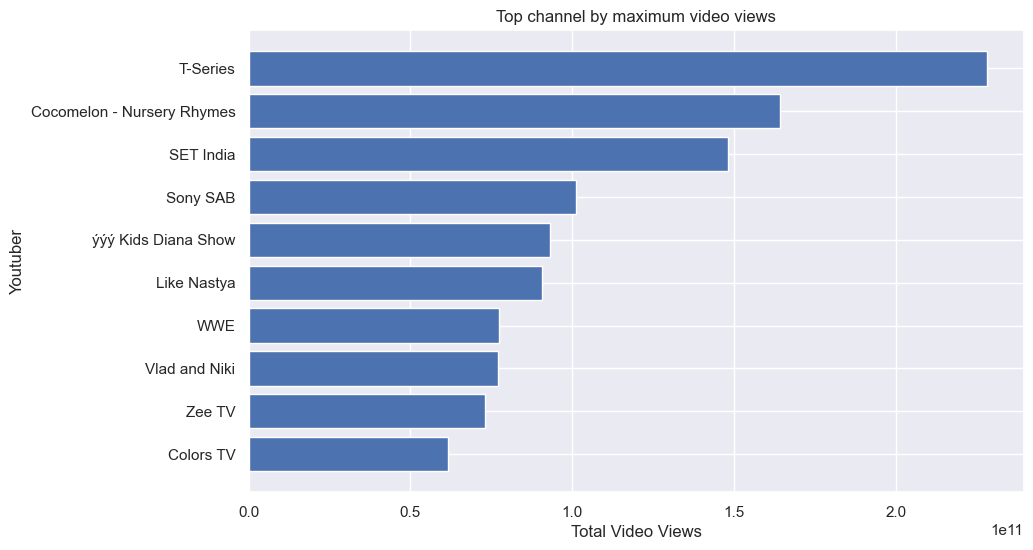

In [14]:
sorted_data = data.sort_values(['video views'], ascending=False)[:10]
select = ["Youtuber", "video views"]
sorted_data = sorted_data[select][:10]
plt.figure(figsize=(10, 6))
plt.barh(sorted_data['Youtuber'], sorted_data['video views'])
plt.xlabel('Total Video Views')
plt.ylabel('Youtuber')
plt.title('Top channel by maximum video views')
plt.gca().invert_yaxis()
plt.show()

We note that the order of the channels has changed, comparing the order of the channels according to the number of followers
However, we find that T-Series retained the first place with the largest number of followers 245,000,000, as well as the largest number of viewers 228,000,000,000 and MrBeast loses the second place, because many channels surpass it in the number of views, and thus Cocomelon - Nursery Rhymes occupies the second place with 
164,000,000,000 views

Top categories by maximum video views

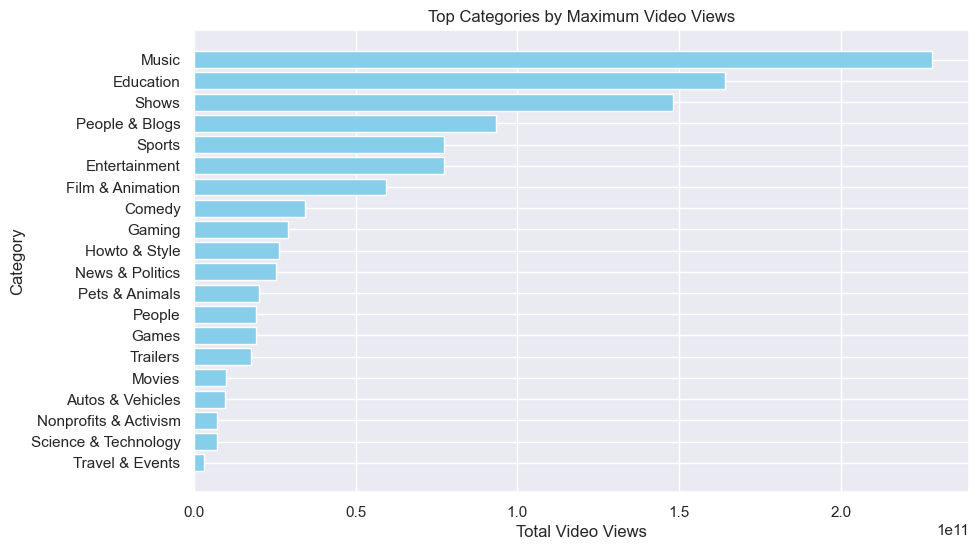

In [15]:
top_categories = data.loc[data.groupby('category')['video views'].idxmax()]
top_categories = top_categories.sort_values(by='video views', ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_categories['category'], top_categories['video views'], color='skyblue')
plt.xlabel('Total Video Views')
plt.ylabel('Category')
plt.title('Top Categories by Maximum Video Views')
plt.gca().invert_yaxis() 
plt.show()

The channels differ according to the type of content, and by arranging the channels according to the number of views, that is, the extent of the viewer’s interest in the type of content, and thus we find that the most watched categories are (Music,Education,Shows,People and Blogs...)

Number of channels by category

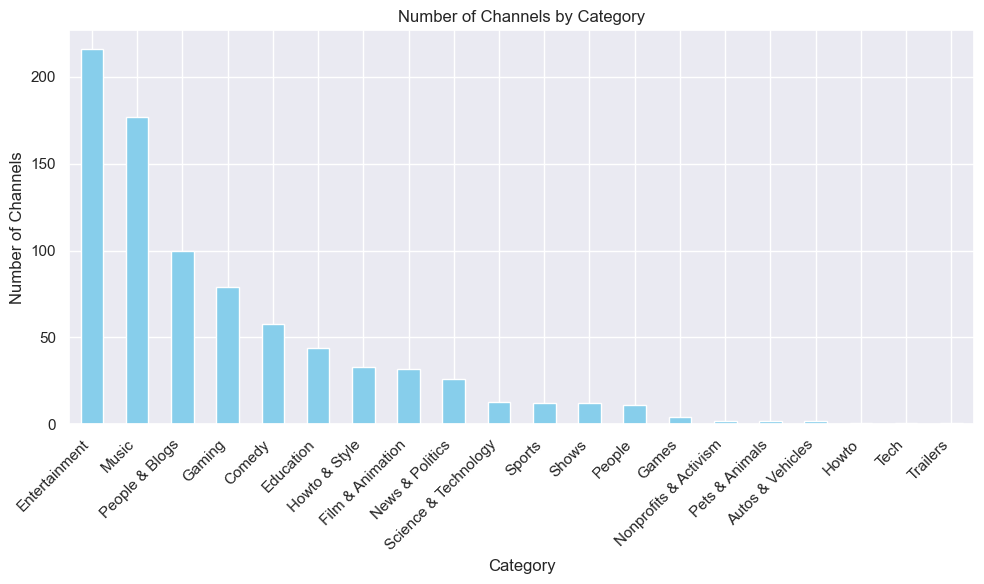

In [16]:
top_categories = data['category'].value_counts().head(20)

# Création du graphique à barres
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Channels')
plt.title('Number of Channels by Category')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes d'axe x pour une meilleure lisibilité
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

We note that the number of channels confirms the high demand for these categories, and this confirms the reason for the high number of views

Extract countries on the map in html file "carte.html"

In [17]:
country_counts = data['Country'].value_counts()
m = folium.Map(location=[0, 0], zoom_start=2)
for country, count in country_counts.items():
    popup_text = f"Country: {country}<br>Number of Channels: {count}"
    folium.Marker([data[data['Country'] == country]['Latitude'].iloc[0],
                   data[data['Country'] == country]['Longitude'].iloc[0]],
                  popup=popup_text).add_to(m)
m.save('carte.html')

The map shows the spread of channels around the world

Top Category by maximum uploads

In [18]:
sorted_Uploads=data.sort_values("uploads",ascending=False)
top_Uploads=["category","uploads"]
sorted_Uploads[top_Uploads][:10]

,category,uploads
88,People & Blogs,301308
786,News & Politics,296272
680,People & Blogs,293516
28,News & Politics,283775
98,News & Politics,273255
625,News & Politics,269050
532,News & Politics,244899
454,News & Politics,211620
611,News & Politics,209520
77,Nonprofits & Activism,200933


We see that the most downloaded channels do not rank in the first place

correlation between Subscribers,video views,uploads,Population and Unemployement rate

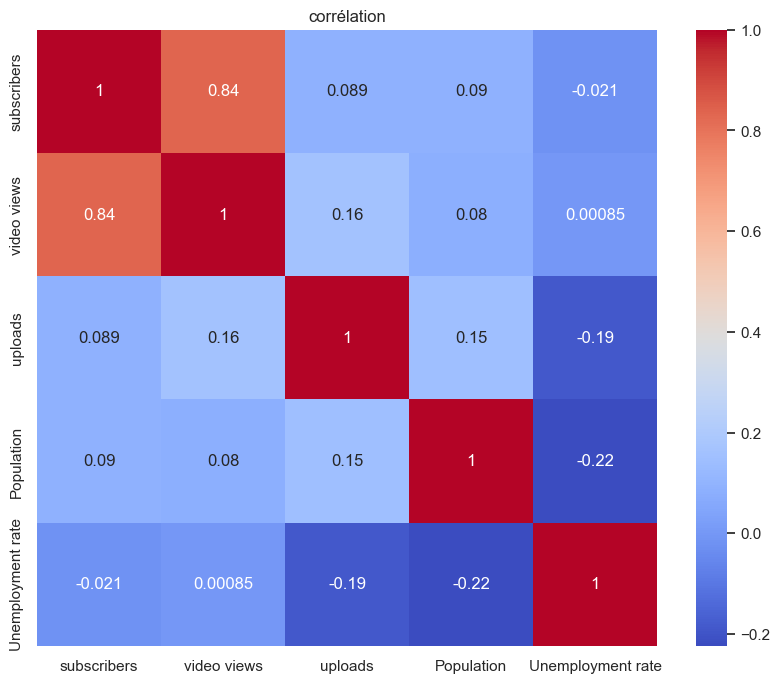

In [19]:
correlation = data[['subscribers', 'video views', 'uploads','Population','Unemployment rate']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('corrélation')
plt.show()

We note through Matrice de corrélation that there is no correlation between subcribers, video views, and uplods with population and rate, and thus shows that population and rate have no effect.

conclusion:
preliminary analysis suggests that YouTube channel rankings have shifted According to the number of views, with content categories like Music, Education, Shows, People, and Blogs attracting the most viewer interest. The high demand for content in these categories contributes to their high view counts. Additionally, the number of downloads may not be directly related to channel rankings, and factors like population and rate do not appear to significantly impact channel popularity. 


Annual revenue comparison by YouTube channel category

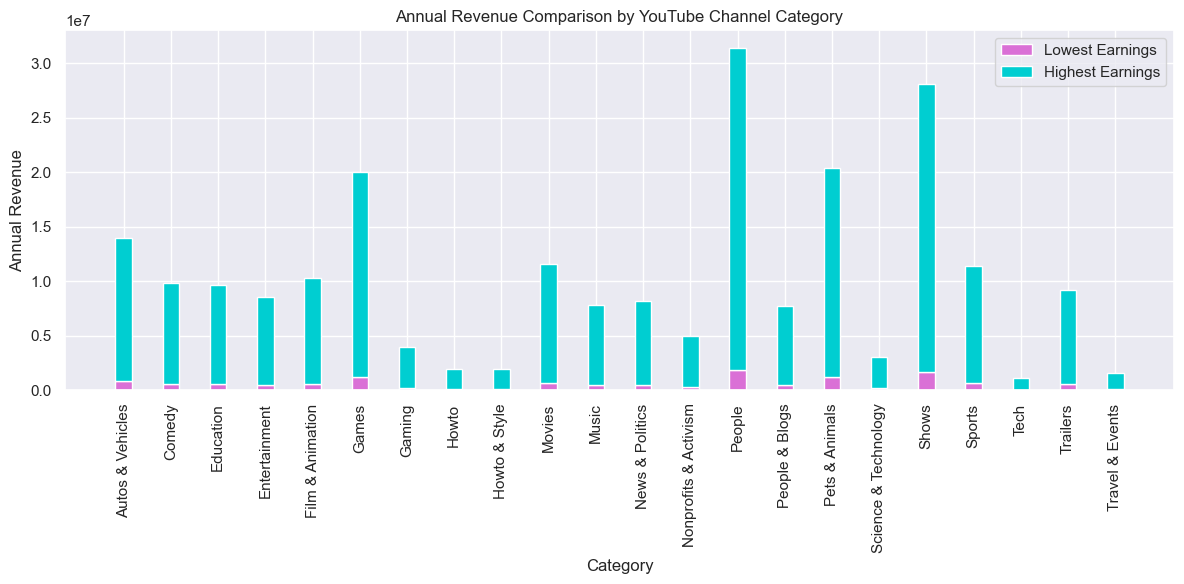

In [20]:
category_revenue = data.groupby('category')[['lowest_yearly_earnings', 'highest_yearly_earnings']].mean().reset_index()
categories = category_revenue['category']
lowest_earnings = category_revenue['lowest_yearly_earnings']
highest_earnings = category_revenue['highest_yearly_earnings']
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(categories))

bar1 = plt.bar(index, lowest_earnings, bar_width, label='Lowest Earnings', color='#DA70D6')
bar2 = plt.bar(index, highest_earnings, bar_width, label='Highest Earnings', color='#00CED1', bottom=lowest_earnings)

plt.xlabel('Category')
plt.ylabel('Annual Revenue')
plt.title('Annual Revenue Comparison by YouTube Channel Category')
plt.xticks(index, categories, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

We note that the most category with the highest revenue is People with 29.59298M and Shows with 26.41667M
We note that both Music and Education have a small percentage of viewership compared to the number of views, the number of followers, and the number of channels.

In [21]:
sorted_revenu= data.sort_values("highest_yearly_earnings",ascending=False)
top_revenu=["Youtuber","highest_yearly_earnings"]
sorted_revenu[top_revenu][:10]	

,Youtuber,highest_yearly_earnings
449,ýýýýýýýýý KIMPRO,"163,400,000"
378,DaFuq!?Boom!,"110,600,000"
0,T-Series,"108,400,000"
2,Cocomelon - Nursery Rhymes,"94,800,000"
3,SET India,"87,500,000"
17,Zee TV,"81,900,000"
127,StarPlus,"80,000,000"
12,Sony SAB,"79,600,000"
76,GR6 EXPLODE,"78,500,000"
303,ZAMZAM ELECTRONICS TRADING,"76,700,000"


Top 10 Youtuber by highest yearly earnings

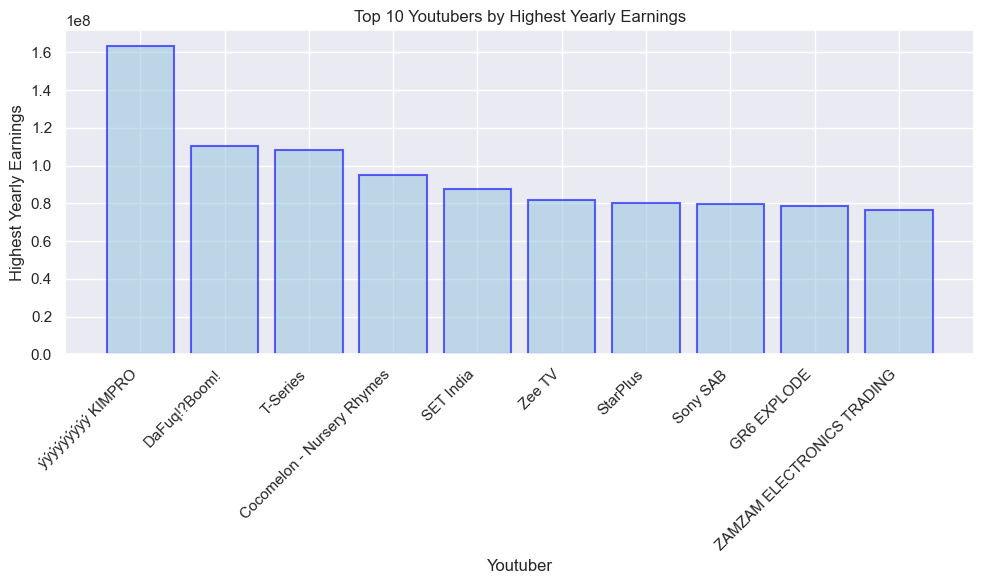

In [22]:

sorted_revenue = data.sort_values("highest_yearly_earnings", ascending=False)[:10]
top_revenue = ["Youtuber", "highest_yearly_earnings"]
top_10_revenue = sorted_revenue[top_revenue][:10]
custom_color = '#9ECAE1'
plt.figure(figsize=(10, 6))
plt.bar(top_10_revenue['Youtuber'], top_10_revenue['highest_yearly_earnings'], color=custom_color, edgecolor='blue', linewidth=1.5, alpha=0.6)
plt.xlabel('Youtuber')
plt.ylabel('Highest Yearly Earnings')
plt.title('Top 10 Youtubers by Highest Yearly Earnings')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()



The most popular channel, which confirms that the number of followers and the number of views does not mean that the channel has it
High stakes and as we can see (ýýýýýýýýýý KIMPRO )gets the highest score with 163,400,000 and (DaFuq!?Boom!) In second place with a value of 110,600,000 and (T-Series) third place with a value of 108,400,000 despite having the largest number of followers and the largest number of viewers

In [23]:
sorted_revenu= data.sort_values("highest_yearly_earnings",ascending=False)
top_revenu=["rank","Youtuber","subscribers","video views","category","Country","highest_yearly_earnings"]
sorted_revenu[top_revenu][:20]


,rank,Youtuber,subscribers,video views,category,Country,highest_yearly_earnings
449,450,ýýýýýýýýý KIMPRO,17700000,"19,206,701,832",People,South Korea,"163,400,000"
378,379,DaFuq!?Boom!,19600000,"7,906,181,776",Film & Animation,United States,"110,600,000"
0,1,T-Series,245000000,"228,000,000,000",Music,India,"108,400,000"
2,3,Cocomelon - Nursery Rhymes,162000000,"164,000,000,000",Education,United States,"94,800,000"
3,4,SET India,159000000,"148,000,000,000",Shows,India,"87,500,000"
17,18,Zee TV,70500000,"73,139,054,467",Entertainment,India,"81,900,000"
127,128,StarPlus,32000000,"26,800,674,545",Entertainment,India,"80,000,000"
12,13,Sony SAB,83000000,"101,000,000,000",Shows,India,"79,600,000"
76,77,GR6 EXPLODE,38900000,"25,154,232,306",Music,Brazil,"78,500,000"
303,304,ZAMZAM ELECTRONICS TRADING,21700000,"8,507,818,877",People,United Arab Emirates,"76,700,000"


We note that the largest revenues are owned by South Korea, the United States and India, given that the categories they provide are among the most successful categories, then it is the turn of the number of followers and the number of viewers to support more success of the channel.


Introduction:
This report presents a preliminary analysis of YouTube channel success factors, their global impact, and correlations between performance metrics and estimated revenue. The analysis is based on YouTube data and Python scripting.

Key Findings:

Shift in Channel Rankings: YouTube channel rankings have shifted, with channels in categories like Music, Education, Shows, People, and Blogs attracting the most viewer interest. This shift reflects changing viewer preferences.

High Demand Categories: Channels in the Music, Education, Shows, People, and Blogs categories experience high viewer demand, leading to their high view counts. Viewer interest in these content categories contributes significantly to their success.

Revenue Insights: The analysis reveals that the People and Shows categories generate the highest revenue, with 29.59298 million and 26.41667 million respectively. This suggests that these categories are not only popular but also profitable.

Viewer Engagement: Interestingly, Music and Education channels have a relatively small percentage of viewership compared to their number of views, subscribers, and channels. This may indicate differences in viewer engagement or retention within these categories.

Global Impact: South Korea, the United States, and India are among the countries with the highest channel revenues. This is likely due to the success of channels in categories that align with viewer preferences in these regions.

Factors Contributing to Channel Success:

a. Content Category: The type of content a channel produces is a crucial factor in determining its success. Categories like Music, Education, Shows, People, and Blogs have widespread appeal, leading to higher viewership.

b. Viewer Demand: High demand for content in specific categories leads to increased viewership and channel success. Channels catering to popular content niches tend to perform better.

c. Revenue Generation: Channels that generate revenue are often more successful. The People and Shows categories generate the highest revenue, indicating that profitability is tied to content category.

d. Geographic Influence: Channel success is influenced by regional preferences. Countries like South Korea, the United States, and India excel in categories aligned with their viewer interests.

Correlations:

The analysis suggests that factors like population and upload rate have limited correlations with channel success. Instead, the key drivers of channel success are:

Content Quality: Channels that produce high-quality content tend to attract more viewers and subscribers.
Viewer Engagement: Channels with high viewer engagement and retention rates are more likely to succeed.
Revenue Generation: Channels that can monetize their content effectively are often more successful.
Conclusion:

In conclusion, YouTube channel success is determined by a combination of factors, including content category, viewer demand, revenue generation, and regional preferences. Channels in popular categories with high viewer engagement tend to perform better and generate more revenue. Understanding these factors can help content creators and marketers strategize for success on the platform. Further analysis and exploration of specific channel attributes and viewer behavior can provide deeper insights into channel performance and revenue generation.